<a href="https://colab.research.google.com/github/Silambarasan92-spec/Assignment_7/blob/main/Assignment_7_Salary_discrimin_Silambarasan_G_DW28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

In [ ]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [ ]:
df

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696
5,0,3,16,1,21,28516
6,1,3,0,0,32,24900
7,0,3,16,1,18,31909
8,0,3,13,0,30,31850
9,0,3,13,0,31,32850


In [ ]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [ ]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.describe()

,Sex,Rank,Year,Degree,YSdeg,Salary
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,0.269231,2.038462,7.480769,0.653846,16.115385,23797.653846
std,0.447888,0.862316,5.507536,0.480384,10.222340,5917.289154
min,0.000000,1.000000,0.000000,0.000000,1.000000,15000.000000
25%,0.000000,1.000000,3.000000,0.000000,6.750000,18246.750000
50%,0.000000,2.000000,7.000000,1.000000,15.500000,23719.000000
75%,1.000000,3.000000,11.000000,1.000000,23.250000,27258.500000
max,1.000000,3.000000,25.000000,1.000000,35.000000,38045.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52 entries, 0 to 51
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Sex     52 non-null     int64
 1   Rank    52 non-null     int64
 2   Year    52 non-null     int64
 3   Degree  52 non-null     int64
 4   YSdeg   52 non-null     int64
 5   Salary  52 non-null     int64
dtypes: int64(6)
memory usage: 2.8 KB


In [ ]:
iqr = df.Year.quantile(0.75) - df.Year.quantile(0.25)
upper_threshold = df.Year.quantile(0.75) + (1.5 * iqr)
lower_threshold = df.Year.quantile(0.25) - (1.5 * iqr)
lower_threshold, upper_threshold

(-9.0, 23.0)

In [ ]:
df.Year = df.Year.clip(-9.0, 23.0)

In [ ]:
df.shape

(52, 6)

In [ ]:
df.groupby('Sex')['Salary'].mean()

Sex
0    24696.789474
1    21357.142857
Name: Salary, dtype: float64

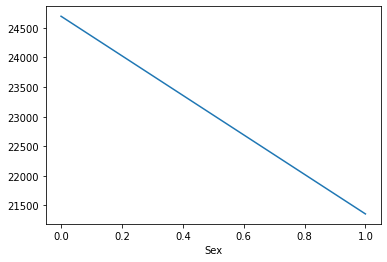

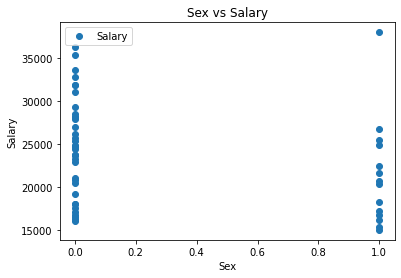

In [ ]:
import matplotlib.pyplot as plt
df.groupby('Sex')['Salary'].mean().plot()
df.plot(x='Sex', y='Salary', style='o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Sex','Salary']].corr()

,Sex,Salary
Sex,1.000000,-0.252782
Salary,-0.252782,1.000000


In [ ]:
df.groupby('Rank')['Salary'].mean()

Rank
1    17768.666667
2    23175.928571
3    29658.950000
Name: Salary, dtype: float64

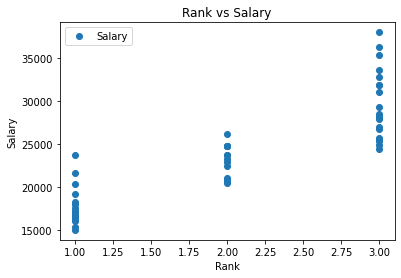

In [ ]:
import matplotlib.pyplot as plt
#df.groupby('Rank')['Salary'].mean().plot()
df.plot(x='Rank', y='Salary', style='o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Rank','Salary']].corr()

,Rank,Salary
Rank,1.000000,0.867488
Salary,0.867488,1.000000


In [ ]:
df.groupby('Degree')['Salary'].mean()

Degree
0    24359.222222
1    23500.352941
Name: Salary, dtype: float64

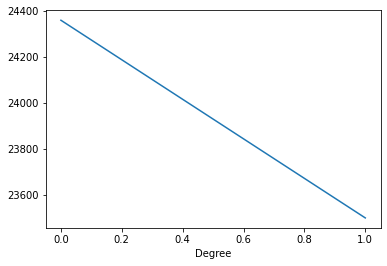

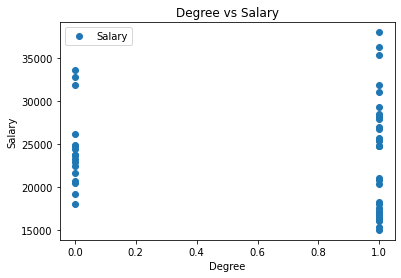

In [ ]:
import matplotlib.pyplot as plt
df.groupby('Degree')['Salary'].mean().plot()
df.plot(x='Degree', y='Salary', style='o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['Degree','Salary']].corr()

,Degree,Salary
Degree,1.000000,-0.069726
Salary,-0.069726,1.000000


In [ ]:
df.groupby('YSdeg')['Salary'].mean()

YSdeg
1     16006.000000
2     17825.000000
3     16875.000000
4     17590.000000
5     16700.000000
6     16150.000000
7     23590.500000
9     20850.000000
11    18000.000000
12    24832.000000
13    27959.000000
14    22889.750000
15    24616.000000
16    25500.000000
17    25962.500000
18    28654.500000
19    24750.000000
20    31114.000000
21    26483.000000
22    31187.500000
23    23687.500000
24    31896.500000
27    25243.500000
29    22450.000000
30    32773.000000
31    25558.333333
32    24900.000000
33    20690.000000
35    36350.000000
Name: Salary, dtype: float64

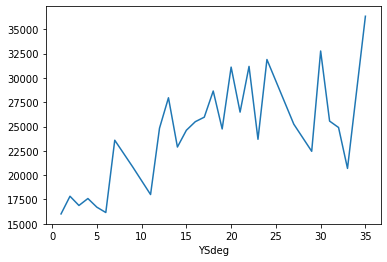

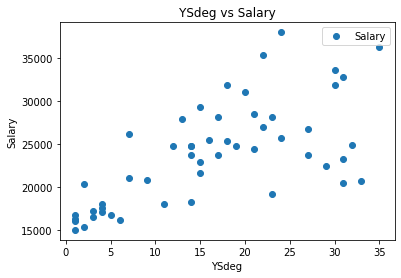

In [ ]:
import matplotlib.pyplot as plt
df.groupby('YSdeg')['Salary'].mean().plot()
df.plot(x='YSdeg', y='Salary', style='o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [ ]:
df[['YSdeg','Salary']].corr()

,YSdeg,Salary
YSdeg,1.000000,0.674854
Salary,0.674854,1.000000


In [ ]:
X = df[['Sex', 'Rank', 'Year', 'Degree','YSdeg']].values #array of features
y = df['Salary'].values #array of targets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =6 )

In [ ]:
from sklearn.preprocessing import StandardScaler ## standrard scalig 
scaler = StandardScaler() #initialise to a variable
scaler.fit(X_train) # we are finding the values of mean and sd from the td
X_train_scaled = scaler.transform(X_train) # fit (mean, sd) and then transform the training data
X_test_scaled = scaler.transform(X_test) # transform the test data

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['Sex', 'Rank', 'Year', 'Degree','YSdeg'], columns=['Coefficient'])
y_pred = regressor.predict(X_test_scaled)
coeff_df

,Coefficient
Sex,64.627918
Rank,4618.164794
Year,2115.605890
Degree,-731.497058
YSdeg,-1320.838142


In [ ]:
regressor.predict(scaler.transform(np.array([[1,3,25,1,25]])))

array([34736.48237527])

In [ ]:
regressor.intercept_ # c 

23499.09756097561

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20300,15839.784204
1,18000,17295.805560
2,17600,17145.783324
3,38045,27495.367226
4,31909,31632.881382
5,36350,32342.960228
6,24900,24470.429828
7,22450,21887.166905
8,25748,27773.232641
9,23713,19489.010791


In [ ]:
from sklearn import metrics
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7032818877507144
